# Thefts increase on weekends in San Francisco and Seattle
## Day of the week theft analysis

This notebook will examine two data sets from the US cities of San Francisco and Seattle. We will analyze how the rates of theft depend on the day of the week. The primary purpose is to have visualizations of these trends, rather than a deep technical analysis.

We begin with some preliminaries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib notebook

In [2]:
# This list will be used to covert from the days of the week and a simple integer
weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [3]:
# Load in the San Francisco crime data in a pandas dataframe
san_francisco_df = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
san_francisco_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [4]:
# Load in the Seattle crime data in a pandas dataframe
seattle_df = pd.read_csv('seattle_incidents_summer_2014.csv')
seattle_df.head()

C:\Users\Ian\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


## Datetime conversions

We will also want to convert the dates from a simple string into datetime objects. This will allow us to extract the day of the week from the Seattle data, which does not have this label in the basic data.

In [5]:
# Convert both dates columns into datetime objects by applying datetime.strptime
seattle_df['Occurred Date or Date Range Start'] = seattle_df['Occurred Date or Date Range Start'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
san_francisco_df['Date'] = san_francisco_df['Date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))

In [6]:
# Use .weekday() to extract the day of the week for all the dates for the Seattle crimes
seattle_df['DayOfWeek'] = seattle_df['Occurred Date or Date Range Start'].apply(lambda x: weekday_list[x.weekday()])

In [7]:
# With the days of the week setup, we can take a quick look at the overall crime count for each of the weekdays
all_crime_df = pd.concat([san_francisco_df['DayOfWeek'].value_counts().rename('San Francisco'), 
                     seattle_df['DayOfWeek'].value_counts().rename('Seattle')], axis=1).reindex(weekday_list)
all_crime_df

,San Francisco,Seattle
Monday,4005,4587
Tuesday,3930,4612
Wednesday,4102,4662
Thursday,3968,4596
Friday,4451,4960
Saturday,4319,4647
Sunday,4218,4715


## Theft definitions

In order to examine thefts, we need a define what we need by theft for the two datasets. Since they do not have the same schema, we must choose what descritpions/categories of crimes will be called "theft". 

Note that we will not include burglary or robbery in our definitions of "thefts", though we will look at them later. We will include embezzlement however.

In [8]:
# We can take a look at the various possible summarized crime labels for the Seattle
seattle_df['Summarized Offense Description'].unique()

array(['BURGLARY', 'FRAUD', 'MAIL THEFT', 'COUNTERFEIT', 'OTHER PROPERTY',
       'EMBEZZLE', 'CAR PROWL', 'THREATS', 'PROPERTY DAMAGE',
       'LOST PROPERTY', 'FORGERY', 'VEHICLE THEFT',
       'BURGLARY-SECURE PARKING-RES', 'PICKPOCKET', 'BIKE THEFT',
       'NARCOTICS', 'DISPUTE', 'ASSAULT', 'STOLEN PROPERTY',
       'WARRANT ARREST', 'TRAFFIC', 'SHOPLIFTING', 'DISTURBANCE',
       'VIOLATION OF COURT ORDER', 'ILLEGAL DUMPING', 'PROSTITUTION',
       'ROBBERY', 'TRESPASS', 'LIQUOR VIOLATION', 'BIAS INCIDENT',
       'THEFT OF SERVICES', 'HOMICIDE', 'RECOVERED PROPERTY', 'OBSTRUCT',
       'RECKLESS BURNING', 'INJURY', 'WEAPON', 'PURSE SNATCH',
       'FALSE REPORT', 'ELUDING', 'ANIMAL COMPLAINT', 'PORNOGRAPHY',
       'DUI', 'FIREWORK', '[INC - CASE DC USE ONLY]', 'PUBLIC NUISANCE',
       'DISORDERLY CONDUCT', 'ESCAPE'], dtype=object)

In [9]:
# Seattle has a large number of different theft labels
# Note 'OTHER PROPERTY' may not seem like theft, but more detailed descriptions show they are
seattle_thefts = ['MAIL THEFT', 'OTHER PROPERTY',
       'CAR PROWL', 'VEHICLE THEFT', 'PICKPOCKET', 'BIKE THEFT',
       'SHOPLIFTING', 'THEFT OF SERVICES', 'PURSE SNATCH', 'EMBEZZLEMENT']
seattle_BURROB = ['BURGLARY', 'ROBBERY']

In [10]:
# We can take a look at the various possible crime category labels for the San Fracnisco
san_francisco_df['Category'].unique()

array(['ARSON', 'NON-CRIMINAL', 'LARCENY/THEFT', 'DRUG/NARCOTIC',
       'DRIVING UNDER THE INFLUENCE', 'OTHER OFFENSES', 'TRESPASS',
       'VEHICLE THEFT', 'ASSAULT', 'FRAUD', 'SUSPICIOUS OCC',
       'SECONDARY CODES', 'WEAPON LAWS', 'MISSING PERSON', 'WARRANTS',
       'ROBBERY', 'DRUNKENNESS', 'PROSTITUTION', 'LIQUOR LAWS',
       'KIDNAPPING', 'FAMILY OFFENSES', 'LOITERING', 'DISORDERLY CONDUCT',
       'FORGERY/COUNTERFEITING', 'EMBEZZLEMENT', 'BURGLARY', 'SUICIDE',
       'VANDALISM', 'STOLEN PROPERTY', 'RUNAWAY', 'GAMBLING', 'EXTORTION',
       'PORNOGRAPHY/OBSCENE MAT', 'BRIBERY'], dtype=object)

In [11]:
# San Francisco doesn't have many theft labels
# Note 'STOLEN PROPERTY' may seem like theft, but more detailed descriptions show they are not and so are not included here
san_francisco_thefts = ['LARCENY/THEFT', 'VEHICLE THEFT', 'EMBEZZLEMENT']
san_francisco_BURROB = ['ROBBERY', 'BURGLARY']

In [12]:
# We can create new dataframe with only data who have the labels matching those in the seattle_thefts or san_francisco_thefts lists 
seattle_thefts_df = seattle_df[seattle_df['Summarized Offense Description'].isin(seattle_thefts)]
san_francisco_thefts_df = san_francisco_df[san_francisco_df['Category'].isin(san_francisco_thefts)]

# Combine these two dataframes together for easier viewing
thefts_df = pd.concat([san_francisco_thefts_df['DayOfWeek'].value_counts().rename('San Francisco'), 
                     seattle_thefts_df['DayOfWeek'].value_counts().rename('Seattle')], axis=1).reindex(weekday_list)
thefts_df

,San Francisco,Seattle
Monday,1524,2070
Tuesday,1462,2066
Wednesday,1520,2177
Thursday,1506,2101
Friday,1744,2350
Saturday,1865,2231
Sunday,1821,2303


## Analysis and visualization

Below we will analyze the theft data. There will be two plots, one indicating the absolute number of thefts per day, the other will be what percentage of all the crimes are thefts or burglaries/robberies for each day of the week.

In [13]:
# This is the trend line for the aboslute number of thefts in San Francisco
thefts_trend_SanFrancisco = np.poly1d(np.polyfit(thefts_df.reset_index()['San Francisco'].index, thefts_df['San Francisco'].values, 1))
thefts_trend_SanFrancisco

poly1d([  68.60714286, 1428.75      ])

In [14]:
# This is the trend line for the aboslute number of thefts in Seattle
thefts_trend_Seattle = np.poly1d(np.polyfit(thefts_df.reset_index()['Seattle'].index, thefts_df['Seattle'].values, 1))
thefts_trend_Seattle

poly1d([  42.92857143, 2056.64285714])

<IPython.core.display.Javascript object>


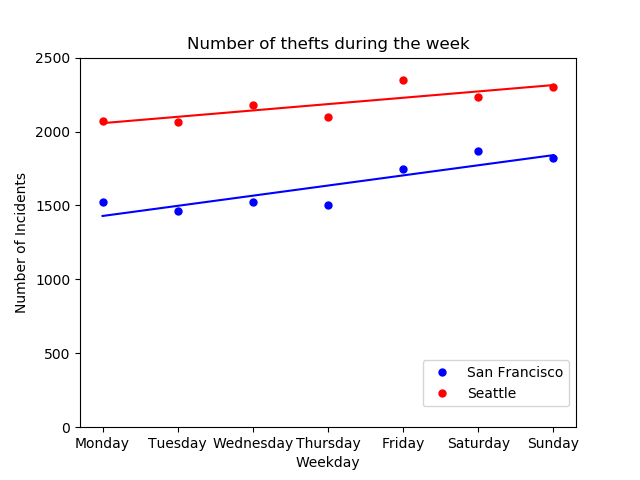

In [15]:
# Begin the figure for number of thefts
plt.figure()
# Include the data for San Francisco
plt.plot(thefts_df['San Francisco'],'.b', markersize=10, label="San Francisco")
# Include the data for Seattle
plt.plot(thefts_df['Seattle'],'.r', markersize=10, label="Seattle")
# Include the trend line for San Francisco
plt.plot(thefts_df['San Francisco'].index,
         thefts_trend_SanFrancisco(thefts_df.reset_index()['San Francisco'].index),
        '-b')
# Include the trend line for Seattle
plt.plot(thefts_df['Seattle'].index,
         thefts_trend_Seattle(thefts_df.reset_index()['Seattle'].index),
        '-r')
# Move legend to good location
plt.legend(bbox_to_anchor=(1, 0.2))
# Various plot details to make it more presentable
plt.ylim(0,2500)
plt.title('Number of thefts during the week')
plt.xlabel('Weekday')
plt.ylabel('Number of Incidents')
plt.show()

We can see in the above figure that as we progress through the week from weekdays to the weekend, the numbers of thefts increases. This is seen both from the general trend of the data but also in the trend line.

Of course, there might be another explaination for this phenomenon. That overall crime increases later in the week and so the increase in thefts are just an artifact. To show examine this, we now look at the percentage of crime that are thefts instead.

In [16]:
# Create new dataframe with percentage of crimes that are thefts
theft_percent_df = thefts_df/all_crime_df*100
theft_percent_df

,San Francisco,Seattle
Monday,38.052434,45.127534
Tuesday,37.201018,44.796184
Wednesday,37.055095,46.696697
Thursday,37.953629,45.713664
Friday,39.182206,47.379032
Saturday,43.181292,48.009468
Sunday,43.172119,48.844115


In [17]:
# We will want to look at burgleries and robberies as well, to discuss if we should have inlcuded them to begin with
# We can create new dataframe with only data who have the labels matching 'BURGLERY' or 'ROBBERY' 
seattle_BURROB_df = seattle_df[seattle_df['Summarized Offense Description'].isin(seattle_BURROB)]
san_francisco_BURROB_df = san_francisco_df[san_francisco_df['Category'].isin(san_francisco_BURROB)]
# We combine these into a single dataframe
BURROB_df = pd.concat([san_francisco_BURROB_df['DayOfWeek'].value_counts().rename('San Francisco'), 
                     seattle_BURROB_df['DayOfWeek'].value_counts().rename('Seattle')], axis=1).reindex(weekday_list)
# We can use this to then find the percentages
BURROB_percent_df= BURROB_df/all_crime_df * 100
BURROB_percent_df

,San Francisco,Seattle
Monday,1.348315,12.644430
Tuesday,0.916031,12.098873
Wednesday,1.194539,12.805663
Thursday,1.058468,12.097476
Friday,0.988542,12.661290
Saturday,0.879833,10.802668
Sunday,1.209104,11.177094


In [18]:
# This is the trend line for the percentage of crimes that are thefts in Seattle
thefts_trend_percent_Seattle = np.poly1d(np.polyfit(theft_percent_df.reset_index()['Seattle'].index, theft_percent_df['Seattle'].values, 1))
thefts_trend_percent_Seattle

poly1d([ 0.65209448, 44.69610146])

In [19]:
# This is the trend line for the percentage of crimes that are thefts in San Francisco
thefts_trend_percent_SanFrancisco = np.poly1d(np.polyfit(theft_percent_df.reset_index()['San Francisco'].index, theft_percent_df['San Francisco'].values, 1))
thefts_trend_percent_SanFrancisco

poly1d([ 1.05166838, 36.24467974])

In [20]:
# This is the trend line for the percentage of crimes that are burglaries or robberies in Seattle
BURROB_trend_percent_Seattle = np.poly1d(np.polyfit(BURROB_percent_df.reset_index()['Seattle'].index, BURROB_percent_df['Seattle'].values, 1))
BURROB_trend_percent_Seattle

poly1d([-0.25495669, 12.80594069])

In [21]:
# This is the trend line for the percentage of crimes that are burglaries or robberies in San Francisco
BURROB_trend_percent_SanFrancisco = np.poly1d(np.polyfit(BURROB_percent_df.reset_index()['San Francisco'].index, BURROB_percent_df['San Francisco'].values, 1))
BURROB_trend_percent_SanFrancisco

poly1d([-0.024858  ,  1.15954989])

<IPython.core.display.Javascript object>


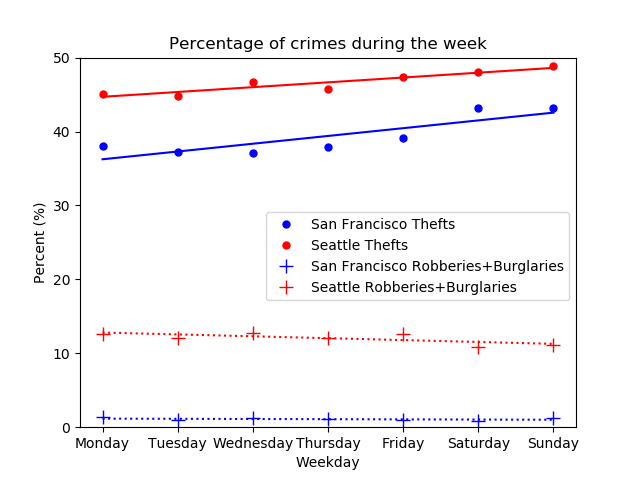

In [22]:
# Begin the figure for percentage of crimes that are thefts
plt.figure()
# Include the theft data for San Francisco
plt.plot(theft_percent_df['San Francisco'],'.b', markersize=10, label="San Francisco Thefts")
# Include the theft trend line for San Francisco
plt.plot(theft_percent_df['San Francisco'].index,
         thefts_trend_percent_SanFrancisco(theft_percent_df.reset_index()['San Francisco'].index),
        '-b')
# Include the theft data for Seattle
plt.plot(theft_percent_df['Seattle'],'.r', markersize=10, label="Seattle Thefts")
# Include the theft trend line for Seattle
plt.plot(theft_percent_df['Seattle'].index,
         thefts_trend_percent_Seattle(theft_percent_df.reset_index()['Seattle'].index),
        '-r')
# Include the burglary/robbery data for San Francisco
plt.plot(BURROB_percent_df['San Francisco'],'+b', markersize=10, label="San Francisco Robberies+Burglaries")
# Include the burglary/robbery trend line for San Francisco
plt.plot(BURROB_percent_df['San Francisco'].index,
         BURROB_trend_percent_SanFrancisco(BURROB_percent_df.reset_index()['San Francisco'].index),
        ':b')
# Include the burglary/robbery data for Seattle
plt.plot(BURROB_percent_df['Seattle'],'+r', markersize=10, label="Seattle Robberies+Burglaries")
# Include the burglary/robbery trend line for Seattle
plt.plot(BURROB_percent_df['Seattle'].index,
         BURROB_trend_percent_Seattle(BURROB_percent_df.reset_index()['Seattle'].index),
        ':r')
# Move legend to good location
plt.legend(bbox_to_anchor=(1, 0.6))
# Various plot details to make it more presentable
plt.ylim(0,50)
plt.title('Percentage of crimes during the week')
plt.xlabel('Weekday')
plt.ylabel('Percent (%)')
plt.show()

We can see in the above graph that even accounting for the overall rate of crime for each day, the percentage of thefts increases later in the week (towards the weekend). This incidates that this increase in theft later in the week is not caused by overall amount of crime.

Furthermore, we see the opposite trend, though slight, in the burglary/robbery data. This may make sense, as we would expect burglaries to occur to empty homes and for robbery to hit when businesses are less busy. 

This raises an important point on which labels should or should not be included for 'theft' and the corresponding effect on the general trend (especially for the Seattle data). To take this general trend and make in concrete would involve a more indepth statistical analysis together with the effects of label choices.